In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("data/drugreviews_clean.csv")

# Preview
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year_month,review_length_chars,review_length_words
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012-05,79,17
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010-04,741,141
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009-12,755,134
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015-11,448,89
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016-11,719,124


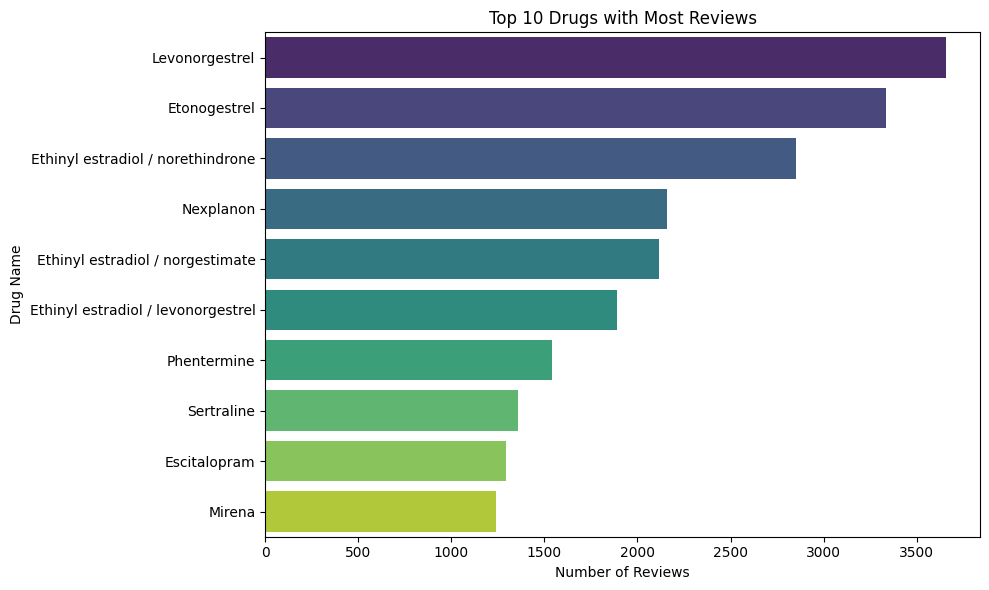

In [4]:
# Top 10 Drugs with Most Reviews
top_drugs = df['drugName'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_drugs.values, y=top_drugs.index, hue=top_drugs.index, dodge=False, legend=False, palette="viridis")
plt.title("Top 10 Drugs with Most Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Drug Name")
plt.tight_layout()
plt.show()

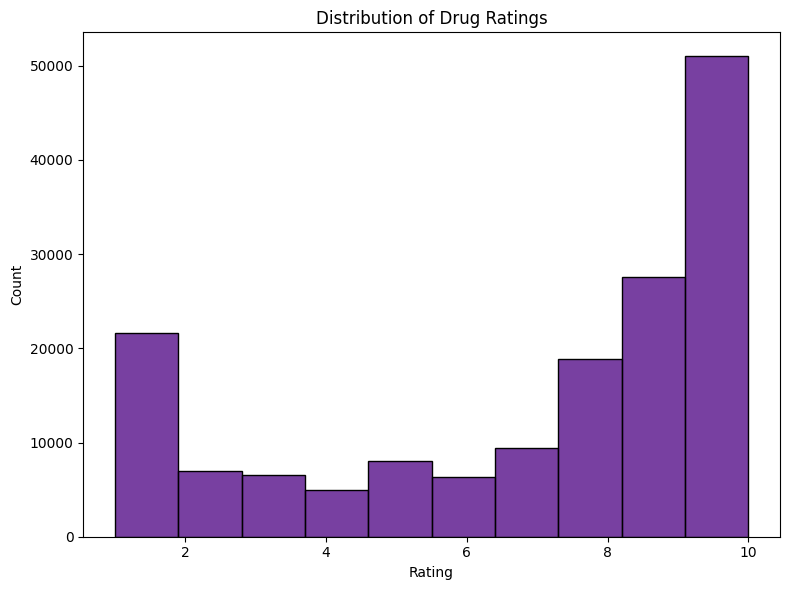

In [7]:
# Distribution of Ratings
plt.figure(figsize=(8,6))
sns.histplot(df['rating'], bins=10, kde=False, color="indigo")
plt.title("Distribution of Drug Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

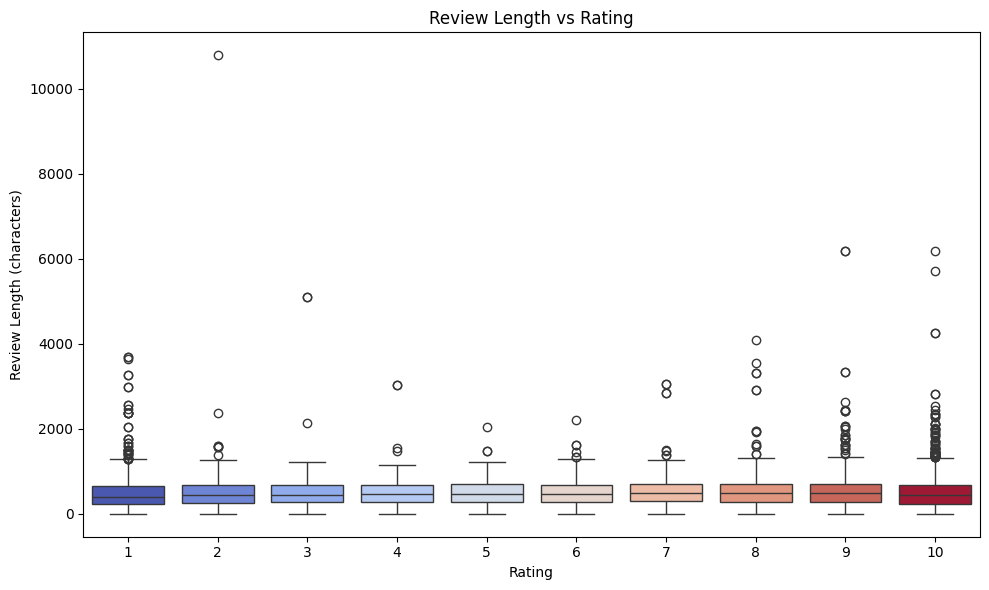

In [11]:
# Relationship between review length and rating
df['review_length'] = df['review'].str.len()

plt.figure(figsize=(10,6))
sns.boxplot(x="rating", y="review_length", hue="rating", legend=False, data=df, palette="coolwarm")
plt.title("Review Length vs Rating")
plt.xlabel("Rating")
plt.ylabel("Review Length (characters)")
plt.tight_layout()
plt.show()

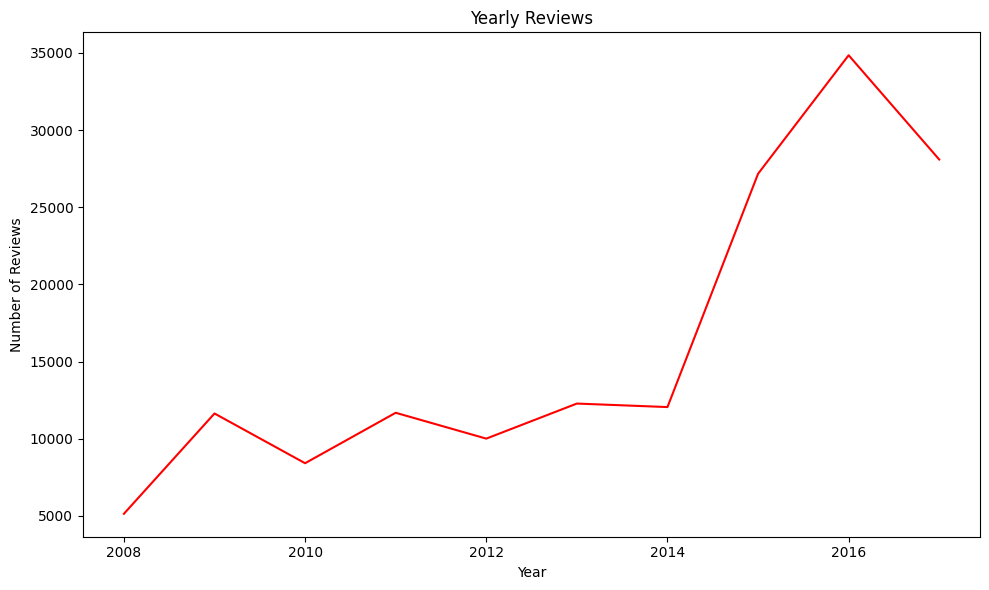

In [17]:
# Trends Over Time (Yearly Reviews)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

reviews_per_year = df.groupby('year').size()

plt.figure(figsize=(10,6))
sns.lineplot(x=reviews_per_year.index, y=reviews_per_year.values, color="red")
plt.title("Yearly Reviews")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()